<a href="https://colab.research.google.com/github/Gauravmehra1/NYCTaxiData.csv/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [94]:
import pandas as pd 
import numpy as np 
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [95]:
from google.colab import drive 
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
File ='/content/drive/MyDrive/ML/NYCTaxiData.csv'
df = pd.read_csv(File)

In [97]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [98]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [99]:
df.shape

(1458644, 11)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [101]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [102]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


#**ID**

In [103]:
df['id'].head()

0    id2875421
1    id2377394
2    id3858529
3    id3504673
4    id2181028
Name: id, dtype: object

In [104]:
df['id'].unique()

array(['id2875421', 'id2377394', 'id3858529', ..., 'id2304944',
       'id2714485', 'id1209952'], dtype=object)

In [105]:
df['id'].value_counts()

id2875421    1
id2249290    1
id2484008    1
id3901436    1
id1265174    1
            ..
id2478352    1
id1159014    1
id3007971    1
id3965191    1
id1209952    1
Name: id, Length: 1458644, dtype: int64

#**vendor_id**

In [106]:
df['vendor_id'].unique

<bound method Series.unique of 0          2
1          1
2          2
3          2
4          2
          ..
1458639    2
1458640    1
1458641    2
1458642    1
1458643    1
Name: vendor_id, Length: 1458644, dtype: int64>

In [107]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

Text(0, 0.5, 'count')

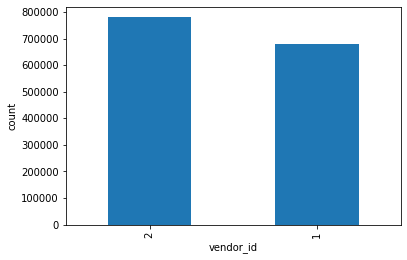

In [108]:
df['vendor_id'].value_counts().plot(kind= 'bar')
plt.xlabel ('vendor_id')
plt.ylabel ('count')

#**pickup_datetime**

In [109]:
df['pickup_datetime'].head()

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

In [110]:
df['pickup_datetime'].unique()

array(['2016-03-14 17:24:55', '2016-06-12 00:43:35',
       '2016-01-19 11:35:24', ..., '2016-01-10 07:35:15',
       '2016-04-22 06:57:41', '2016-01-05 15:56:26'], dtype=object)

In [111]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [112]:
df['date_pickup']=df['pickup_datetime'].dt.date
df['date_pickup']

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: date_pickup, Length: 1458644, dtype: object

In [113]:
df['date_pickup']= pd.to_datetime(df['date_pickup'])
df['date_pickup'].dt.strftime('%Y-%b-%d')

0          2016-Mar-14
1          2016-Jun-12
2          2016-Jan-19
3          2016-Apr-06
4          2016-Mar-26
              ...     
1458639    2016-Apr-08
1458640    2016-Jan-10
1458641    2016-Apr-22
1458642    2016-Jan-05
1458643    2016-Apr-05
Name: date_pickup, Length: 1458644, dtype: object

In [114]:
df['time_pickup']=df['pickup_datetime'].dt.time
df['time_pickup']

0          17:24:55
1          00:43:35
2          11:35:24
3          19:32:31
4          13:30:55
             ...   
1458639    13:31:04
1458640    07:35:15
1458641    06:57:41
1458642    15:56:26
1458643    14:44:25
Name: time_pickup, Length: 1458644, dtype: object

In [115]:
df['pickup_datetime'].max()

Timestamp('2016-06-30 23:59:39')

In [143]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['pickup_day_no']= df['pickup_datetime'].dt.weekday
df['pickup_hour']= df['pickup_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month_name()

In [117]:
def time_day(x):
  if x in range(6 ,12):
    return('morning')
  elif x in range(12 , 16):
     return('afternoon')
  elif x in range(16 , 22 ):
    return('evening')
  else:
    return('night')

In [118]:
df['time_day']= df['pickup_hour'].apply(time_day)
df['time_day']

0            evening
1              night
2            morning
3            evening
4          afternoon
             ...    
1458639    afternoon
1458640      morning
1458641      morning
1458642    afternoon
1458643    afternoon
Name: time_day, Length: 1458644, dtype: object

In [145]:
#Making new coloumns by cleaning our old coloumn 
pd.concat([df['date_pickup'],df['pickup_day'],df['pickup_hour'],df['pickup_month'],df['time_pickup'],df['time_day']],axis=1)

,date_pickup,pickup_day,pickup_hour,pickup_month,time_pickup,time_day
0,2016-03-14,Monday,17,March,17:24:55,evening
1,2016-06-12,Sunday,0,June,00:43:35,night
2,2016-01-19,Tuesday,11,January,11:35:24,morning
3,2016-04-06,Wednesday,19,April,19:32:31,evening
4,2016-03-26,Saturday,13,March,13:30:55,afternoon
...,...,...,...,...,...,...
1458639,2016-04-08,Friday,13,April,13:31:04,afternoon
1458640,2016-01-10,Sunday,7,January,07:35:15,morning
1458641,2016-04-22,Friday,6,April,06:57:41,morning
1458642,2016-01-05,Tuesday,15,January,15:56:26,afternoon


Text(0, 0.5, 'no of pickup ')

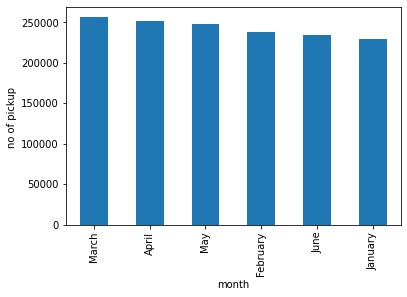

In [121]:
#graph of month
df['pickup_month'].value_counts().plot(kind='bar')
plt.xlabel ('month')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of pickup ')

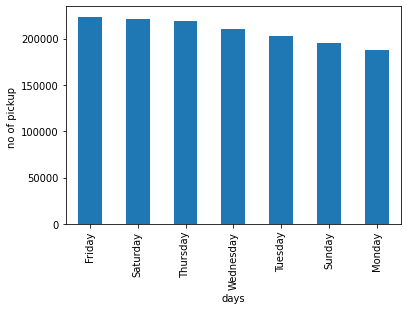

In [122]:
#graph of days
df['pickup_day'].value_counts().plot(kind='bar')
plt.xlabel ('days')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of pickup ')

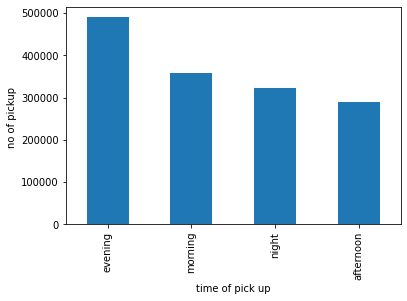

In [123]:
#graph of time pick up
df['time_day'].value_counts().plot(kind='bar')
plt.xlabel ('time of pick up')
plt.ylabel ('no of pickup ')

Text(0, 0.5, 'no of pickup ')

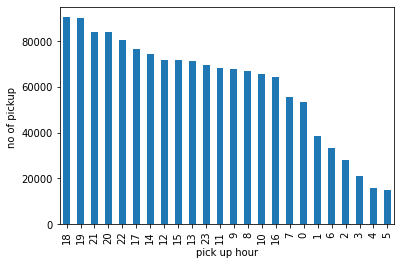

In [124]:
#graph of hours
df['pickup_hour'].value_counts().plot(kind='bar')
plt.xlabel ('pick up hour')
plt.ylabel ('no of pickup ')

#**dropoff_datetime**


In [125]:
df['dropoff_datetime'].unique()

array(['2016-03-14 17:32:30', '2016-06-12 00:54:38',
       '2016-01-19 12:10:48', ..., '2016-04-22 07:10:25',
       '2016-01-05 16:02:39', '2016-04-05 14:47:43'], dtype=object)

In [153]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['dropoff_datetime']

0         2016-03-14 17:32:30
1         2016-06-12 00:54:38
2         2016-01-19 12:10:48
3         2016-04-06 19:39:40
4         2016-03-26 13:38:10
                  ...        
1458639   2016-04-08 13:44:02
1458640   2016-01-10 07:46:10
1458641   2016-04-22 07:10:25
1458642   2016-01-05 16:02:39
1458643   2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1458644, dtype: datetime64[ns]

In [155]:
df['drop_date']=df['dropoff_datetime'].dt.date
df['drop_date']

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: drop_date, Length: 1458644, dtype: object

In [154]:
df['drop_time']=df['dropoff_datetime'].dt.time
df['drop_time']

0          17:32:30
1          00:54:38
2          12:10:48
3          19:39:40
4          13:38:10
             ...   
1458639    13:44:02
1458640    07:46:10
1458641    07:10:25
1458642    16:02:39
1458643    14:47:43
Name: drop_time, Length: 1458644, dtype: object

In [140]:
df['drop_hour']=df['dropoff_datetime'].dt.hour
df['drop_day']=df['dropoff_datetime'].dt.day_name()
df['drop_month']=df['dropoff_datetime'].dt.month_name()


In [147]:
def drop(y):
  if y in range(6,12):
    return('morning')
  elif y in range(12,16):
    return('afternoon')
  elif y in range(16,22):
    return('evening')
  else:
    return('night')

In [ ]:
df['drop']=df['drop_hour'].apply(drop)
df['drop']

In [159]:
pd.concat([df['drop_date'],df['drop_day'],df['drop_hour'],df['drop_time'],df['drop_month'],df['drop']],axis=1)

,drop_date,drop_day,drop_hour,drop_time,drop_month,drop
0,2016-03-14,Monday,17,17:32:30,March,evening
1,2016-06-12,Sunday,0,00:54:38,June,night
2,2016-01-19,Tuesday,12,12:10:48,January,afternoon
3,2016-04-06,Wednesday,19,19:39:40,April,evening
4,2016-03-26,Saturday,13,13:38:10,March,afternoon
...,...,...,...,...,...,...
1458639,2016-04-08,Friday,13,13:44:02,April,afternoon
1458640,2016-01-10,Sunday,7,07:46:10,January,morning
1458641,2016-04-22,Friday,7,07:10:25,April,morning
1458642,2016-01-05,Tuesday,16,16:02:39,January,evening
